# This notebook may be used to see what happens when we drop trolley probes using multipole moments. This has not been analyzed for Legendre yet.

### There used to be another Notebook similar to this one called TrolleyDropsJonathan-Copy1. Which was the exact same, but looking at a stationary Trolley run (SuperlongRun1?). Such a notebook was deleted with the cleanup (On or after 6/28)

In [1]:
#filename = 'hdf5/9day.h5'
filename = 'hdf5/superlong_2.h5'
#filename = 'hdf5/60hr.h5' #Format: 'hdf5/FileName.h5'
                                 #'hdf5' is the name of thae folder that contains the hdf5 file named FileName, .h5 is
                                 #format of the file (like .txt or .csv)
a = 5

In [2]:
%load_ext autoreload
%autoreload 2

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
import scipy
from itertools import combinations, combinations_with_replacement, permutations

import gm2
import trfp
import plotting_functions as plt2
import AnalysisHelper as helper
import helper_function_candidates as helper_old
import allantools
from IPython.display import clear_output
import os

Welcome to JupyROOT 6.22/02


In [3]:
path = os.path.abspath('ProbeDropPlots_Jonathan')

In [4]:
#pd.read_hdf('hdf5/60hr.h5', key = 'tr_df_1')

In [5]:
def plt_unix_time_to_CST(ax):
    ax.locator_params(axis='x', nbins=5)
    xticks = ax.get_xticks()
    ax.set_xticklabels([pd.to_datetime(tm, unit='s').tz_localize('UTC').tz_convert('US/Central').strftime('%Y-%m-%d\n %H:%M:%S %Z')
                        for tm in xticks], rotation=0, fontdict={'size':10, 'family':'serif'})

def difference(y, avgt):      ##Compresses an array by averaging over the given averaging time to "bin" the data, difference is a misleading name
    t = np.arange(int(avgt) , len(y), int(avgt))
    N = len(t)
    Sum = 0
    avgdiff = np.array([])
    for i in range(len(y)):
        Sum += y[i]
        if i % avgt == 0 and i > 0:
            avg = Sum/avgt
            Sum = 0
            avgdiff = np.append(avgdiff, avg)
            
        
    return (t,avgdiff)

def bin_vtm(vtm_df, autobin=True, start=None, end=None, dt=None):
    
    if autobin:
        dt = 1000
        start = np.ceil(vtm_df.index.values[0]/dt)*dt
        end = np.floor(vtm_df.index.values[-1]/dt)*dt
        
    bin_edges = np.arange(start, end+dt, dt)
    bin_centers = np.arange(start, end, dt)+dt/2
        
    bin_df = vtm_df.groupby(pd.cut(vtm_df.index, bin_edges)).mean()
    bin_df.index = bin_centers
    return bin_df

def MovingAvg(x, bin_size):
    avg = np.array([])
    for i in np.arange(len(x) - bin_size + 1):
    #while (i <= len(x) - bin_size):
        Sum = 0
        j = 0
        for j in np.arange(bin_size):
        #while (j < bin_size):
            Sum += x[i + j]
            #j += 1
        avg = np.append(avg, Sum)
        #if(i % 86400 == 0):
            #print(str(i) + "iterations done")
        i +=1
    return avg/bin_size

def Drops(nProbes, nDrops):
    L = list(combinations(range(nProbes), nProbes - nDrops))
    N = len(L)
    drops = np.zeros((N ,nProbes))
    for i in range(N):
        for j in range(nProbes-nDrops):
            drops[i, L[i][j]] = 1
    return drops.astype('int')

def DropsToLabel(drops):
    label = "Dropped probes( "
    for i in range(len(drops)):
        if drops[i] == 0:
            label += str(i) +", "
    return label[:-2] + ")"

In [6]:
nProbes = 17
Binsize = 40
#helper.root_to_pandas([3956], prefix = r'//data1/newg2/DataProduction/Offline/ArtTFSDir/v9_21_05_dev/FieldPlainRootOutput_',\
#                      tr_run=True)

interp_df = helper.root_to_pandas([3956],\
                                  prefix = r'//data1/newg2/DataProduction/Offline/ArtTFSDir/v9_21_05_dev/FieldPlainRootOutput_',\
                                  tr_run = True)

Reading event 8780/8781 99.99%        
loop done: 100%                                    
Reading event 2630/2634 99.85% 
loop done: 100%                                    


In [7]:
nProbes = 17
Binsize = 40

rolling_windows = helper.calc_moment_df(interp_df).rolling(Binsize, min_periods=Binsize)
avgdMoment_df = rolling_windows.mean()

nEvents = len(np.delete(avgdMoment_df["tr,m1"].to_numpy(), np.arange(39)))
trm_undropped = np.zeros((nProbes, nEvents))
for i in range(nProbes):
    trm_undropped[i] = np.delete(avgdMoment_df["tr,m" + str(i+1)].to_numpy(), np.arange(39))
    T = np.delete(avgdMoment_df.index.to_numpy(), np.arange(39))

Finished calculating all moments for 4386 events.


In [8]:
#One drop posib.
PossibleDropsN = np.flip(Drops(17,1), axis = 0)

In [9]:
nDrops = 1

trm_dropped = np.zeros((len(PossibleDropsN), nProbes, nEvents))
for i in range(len(PossibleDropsN)):
    rolling_windows = helper.calc_moment_df(interp_df, trolleyProbes = PossibleDropsN[i])\
    .rolling(Binsize, min_periods = Binsize)
    moment_df_dropped = rolling_windows.mean()
    for j in range(nProbes):
        trm_dropped[i,j] = np.delete(moment_df_dropped["tr,m" + str(j+1)].to_numpy(), np.arange(39))

Finished calculating all moments for 4386 events.
Finished calculating all moments for 4386 events.
Finished calculating all moments for 4386 events.
Finished calculating all moments for 4386 events.
Finished calculating all moments for 4386 events.
Finished calculating all moments for 4386 events.
Finished calculating all moments for 4386 events.
Finished calculating all moments for 4386 events.
Finished calculating all moments for 4386 events.
Finished calculating all moments for 4386 events.
Finished calculating all moments for 4386 events.
Finished calculating all moments for 4386 events.
Finished calculating all moments for 4386 events.
Finished calculating all moments for 4386 events.
Finished calculating all moments for 4386 events.
Finished calculating all moments for 4386 events.
Finished calculating all moments for 4386 events.


In [10]:
tr_phi = moment_df_dropped['tr_phi'].to_numpy()[39:]

[261.33878773 261.27609976 261.21123561 ... 261.72357178 261.72357178
 261.72357178]


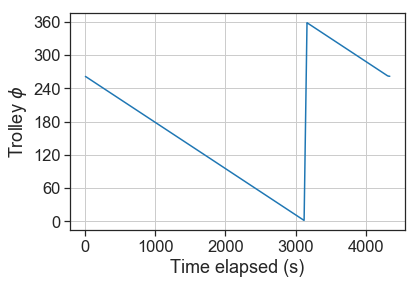

In [11]:
print(tr_phi)
plt.plot(T-T[0], tr_phi)
plt.xlabel('Time elapsed (s)')
plt.ylabel(r'Trolley $\phi$')
plt.yticks(np.linspace(0,360, 7))
plt.grid()
plt.show()

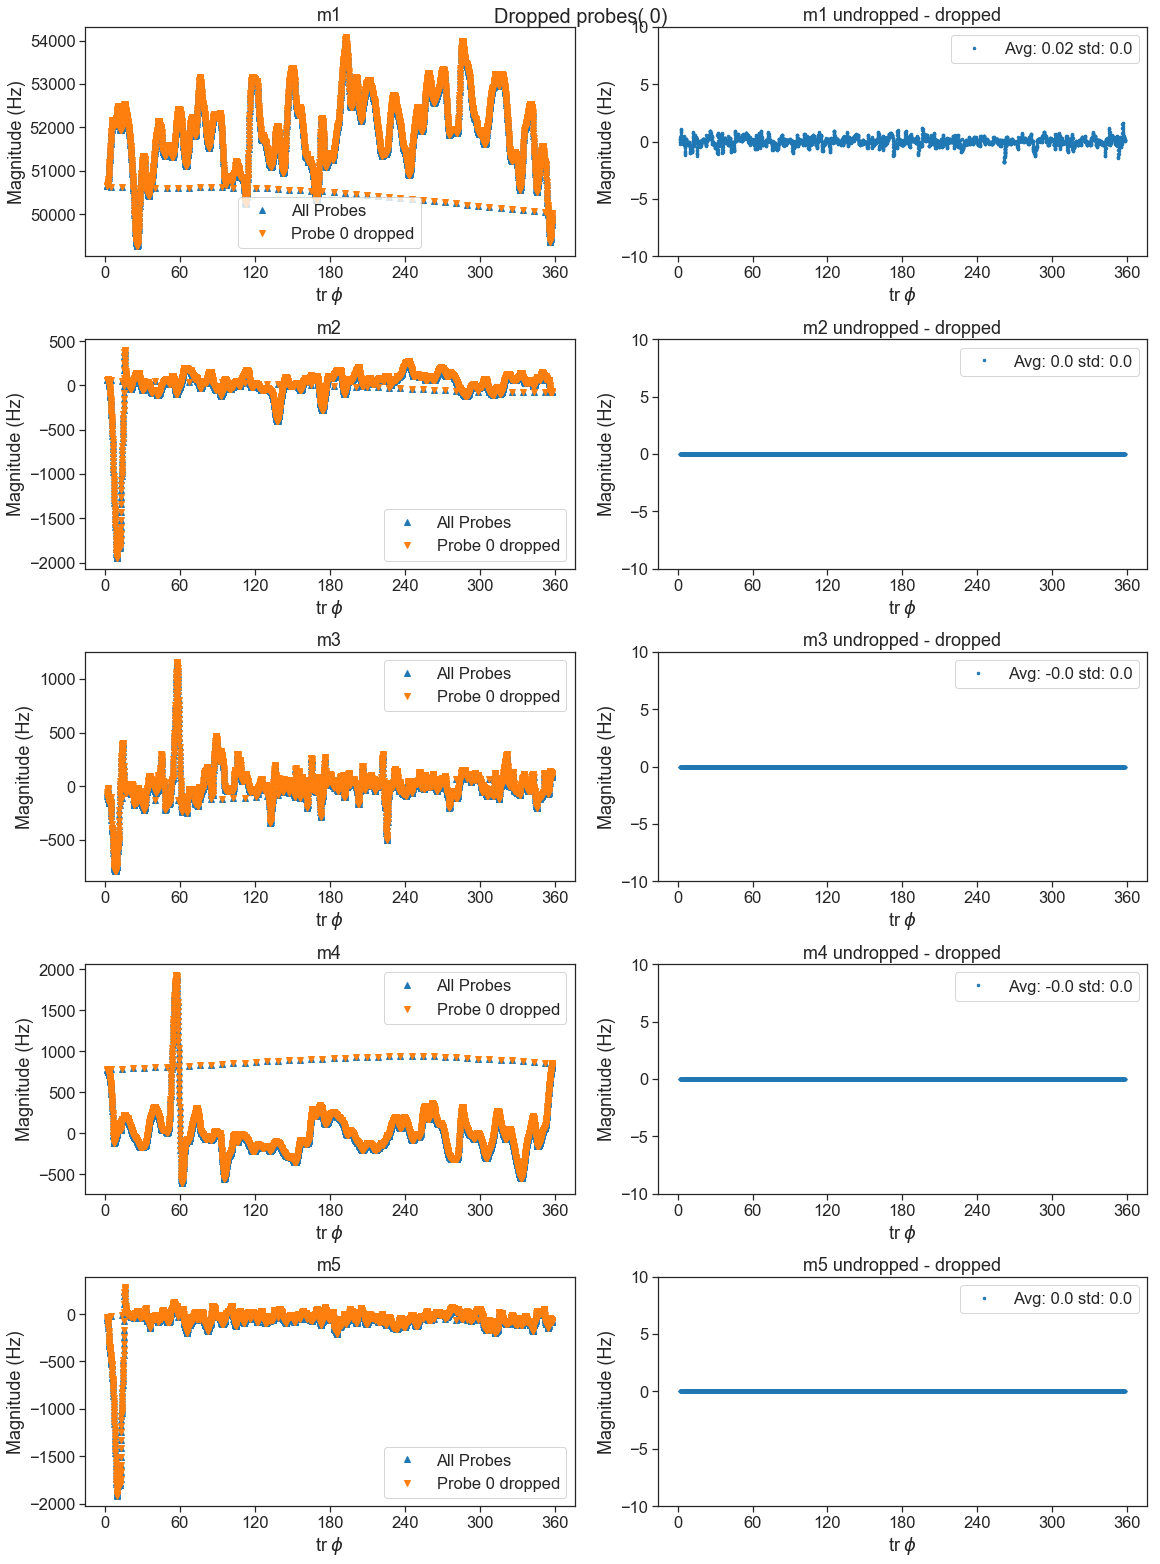

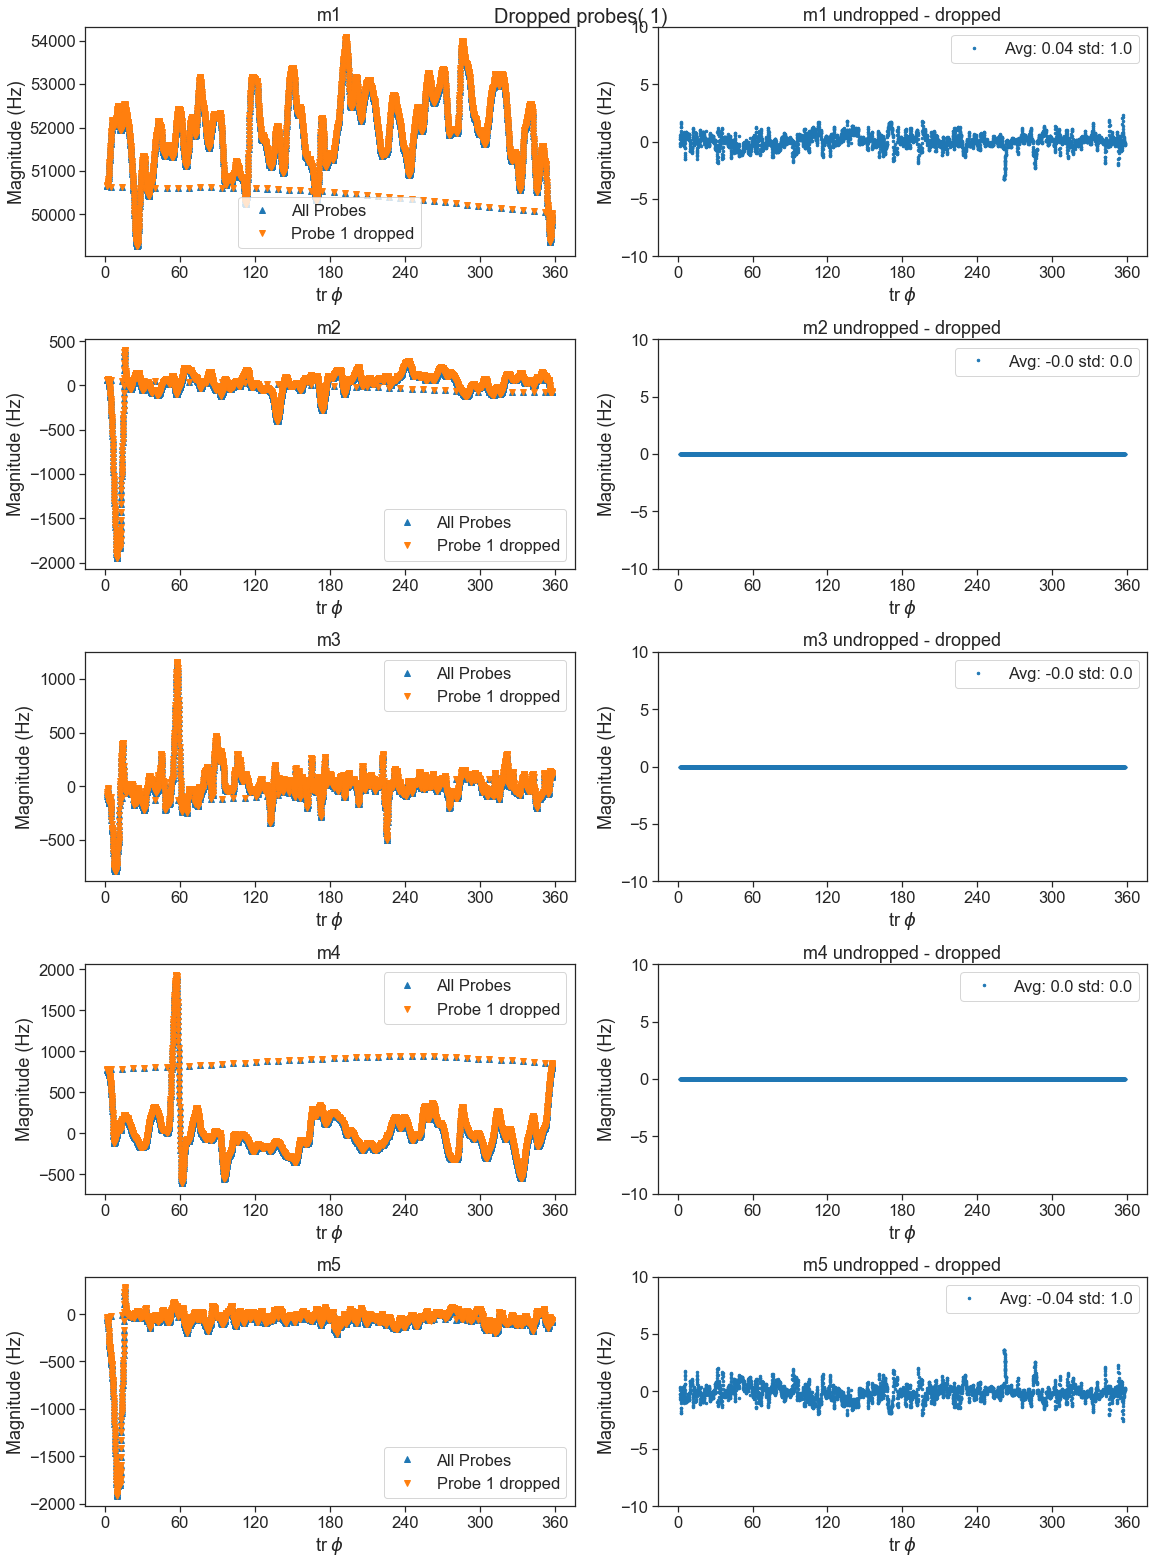

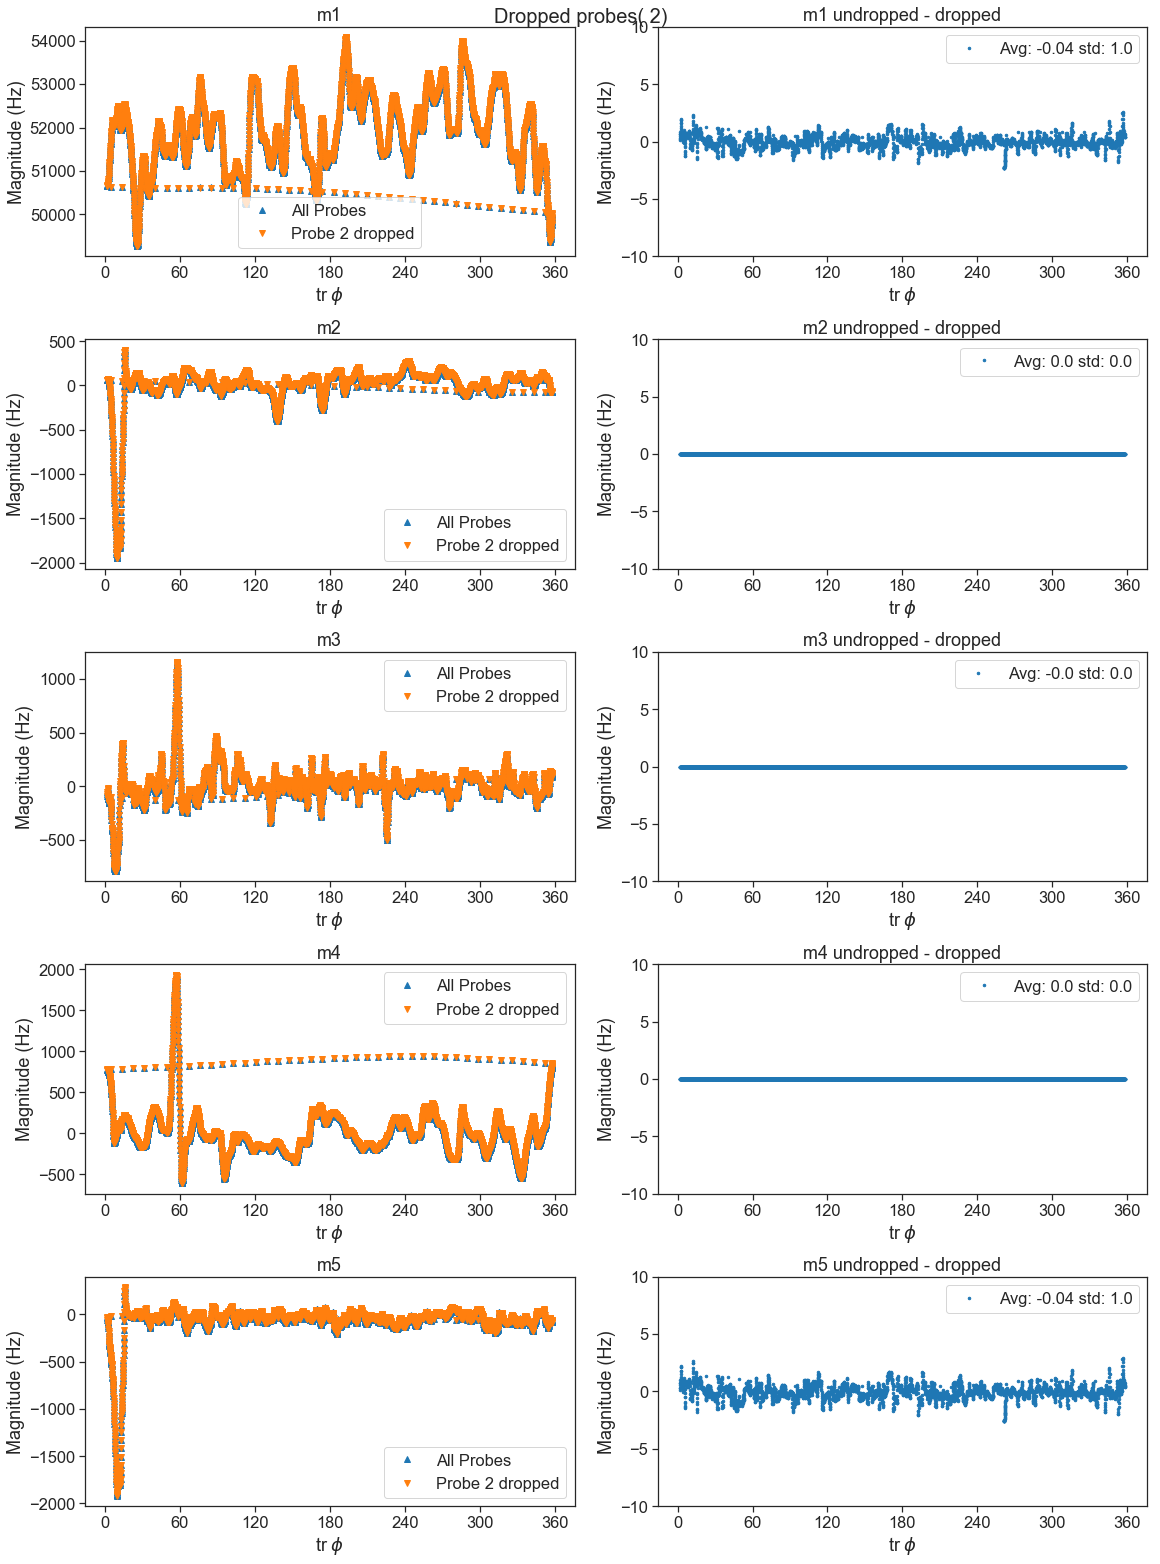

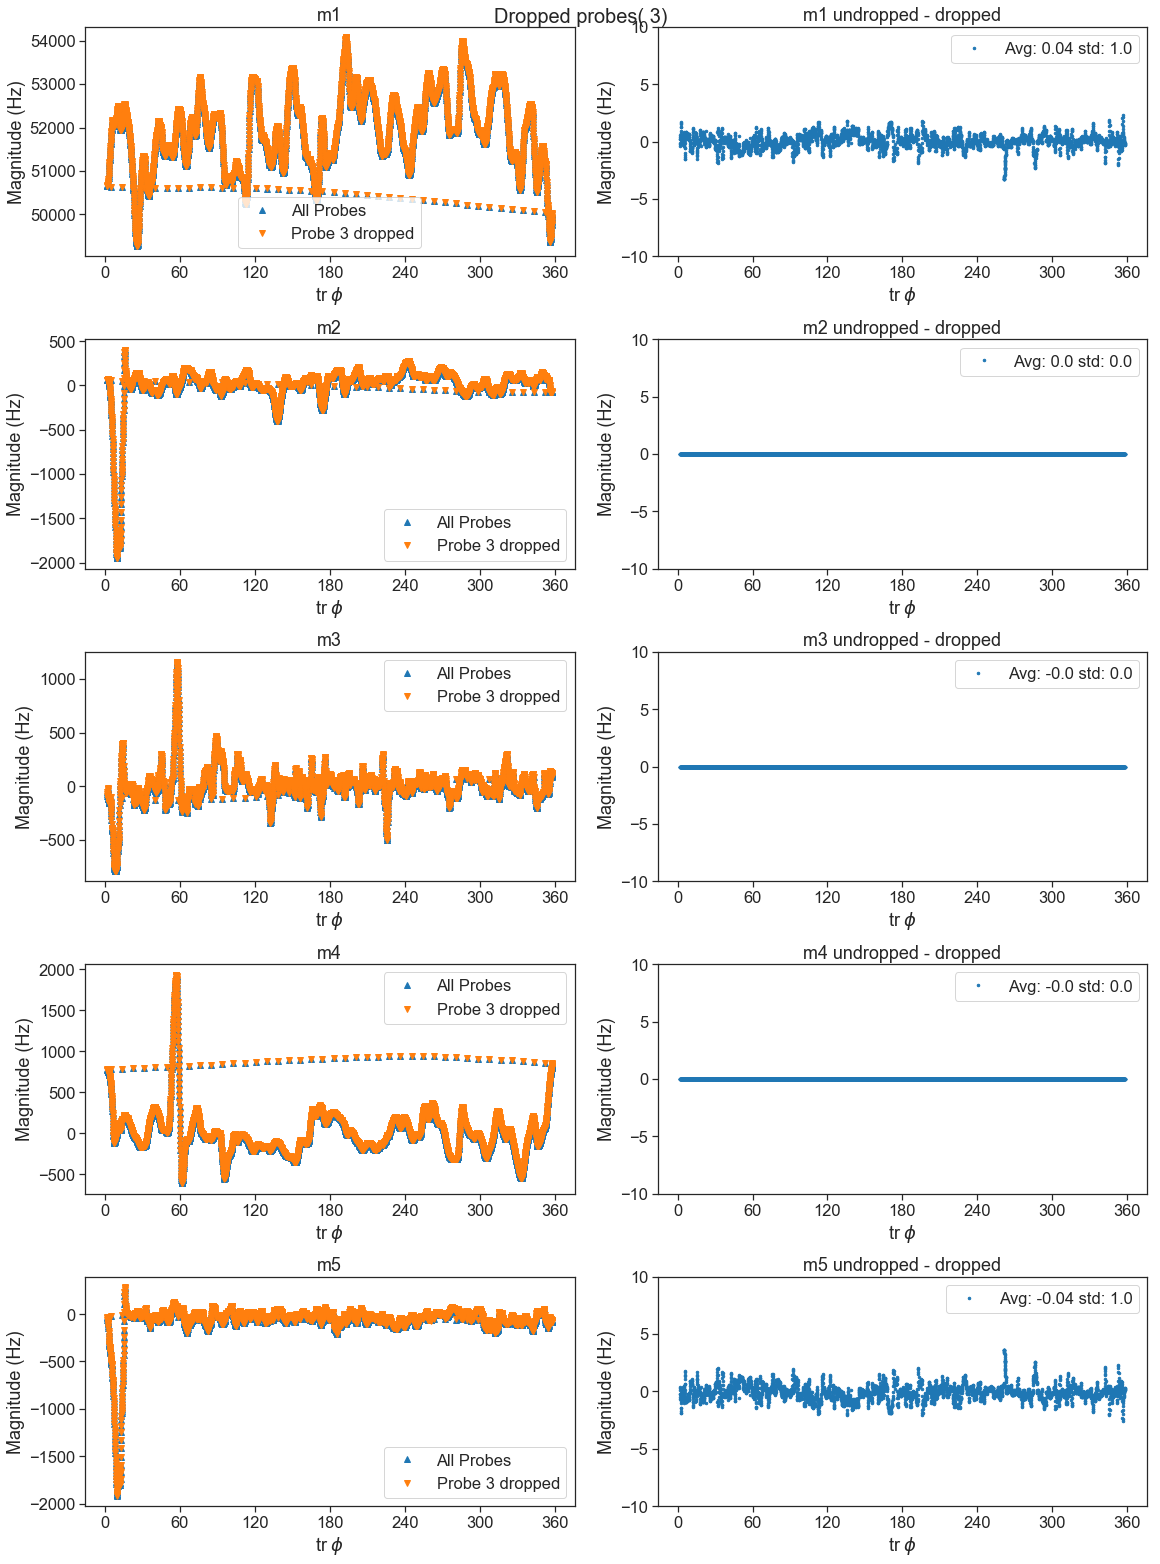

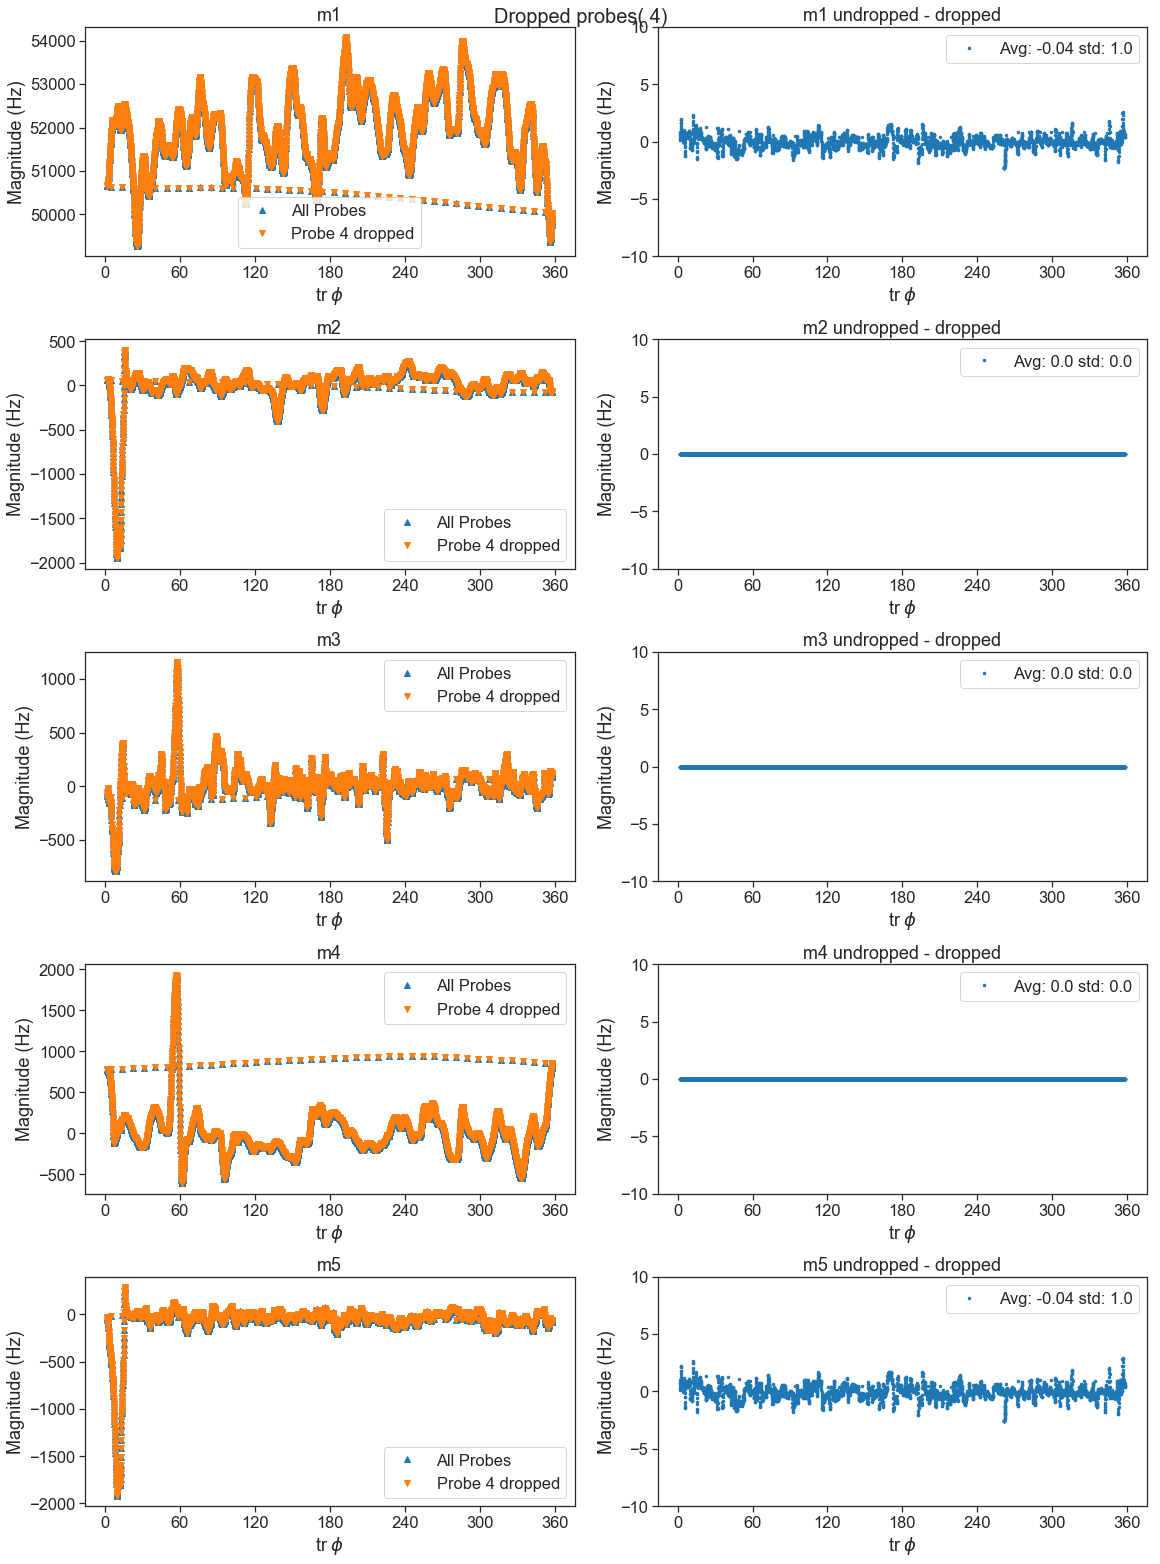

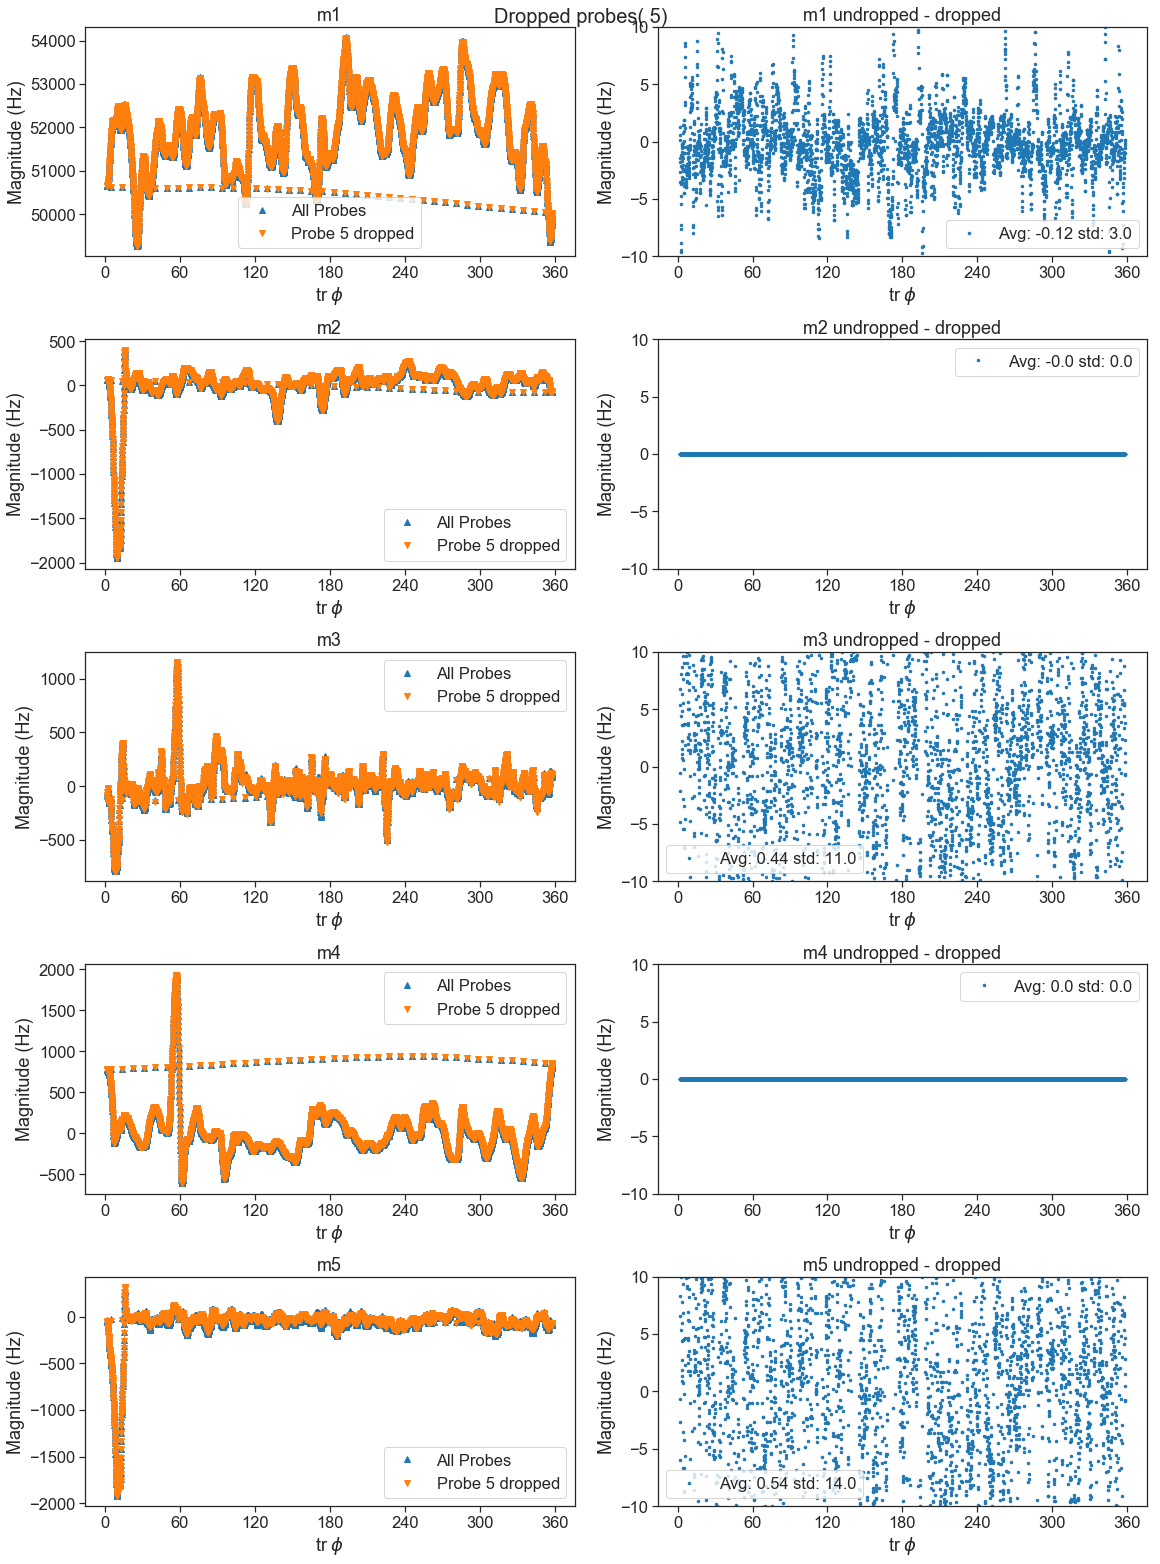

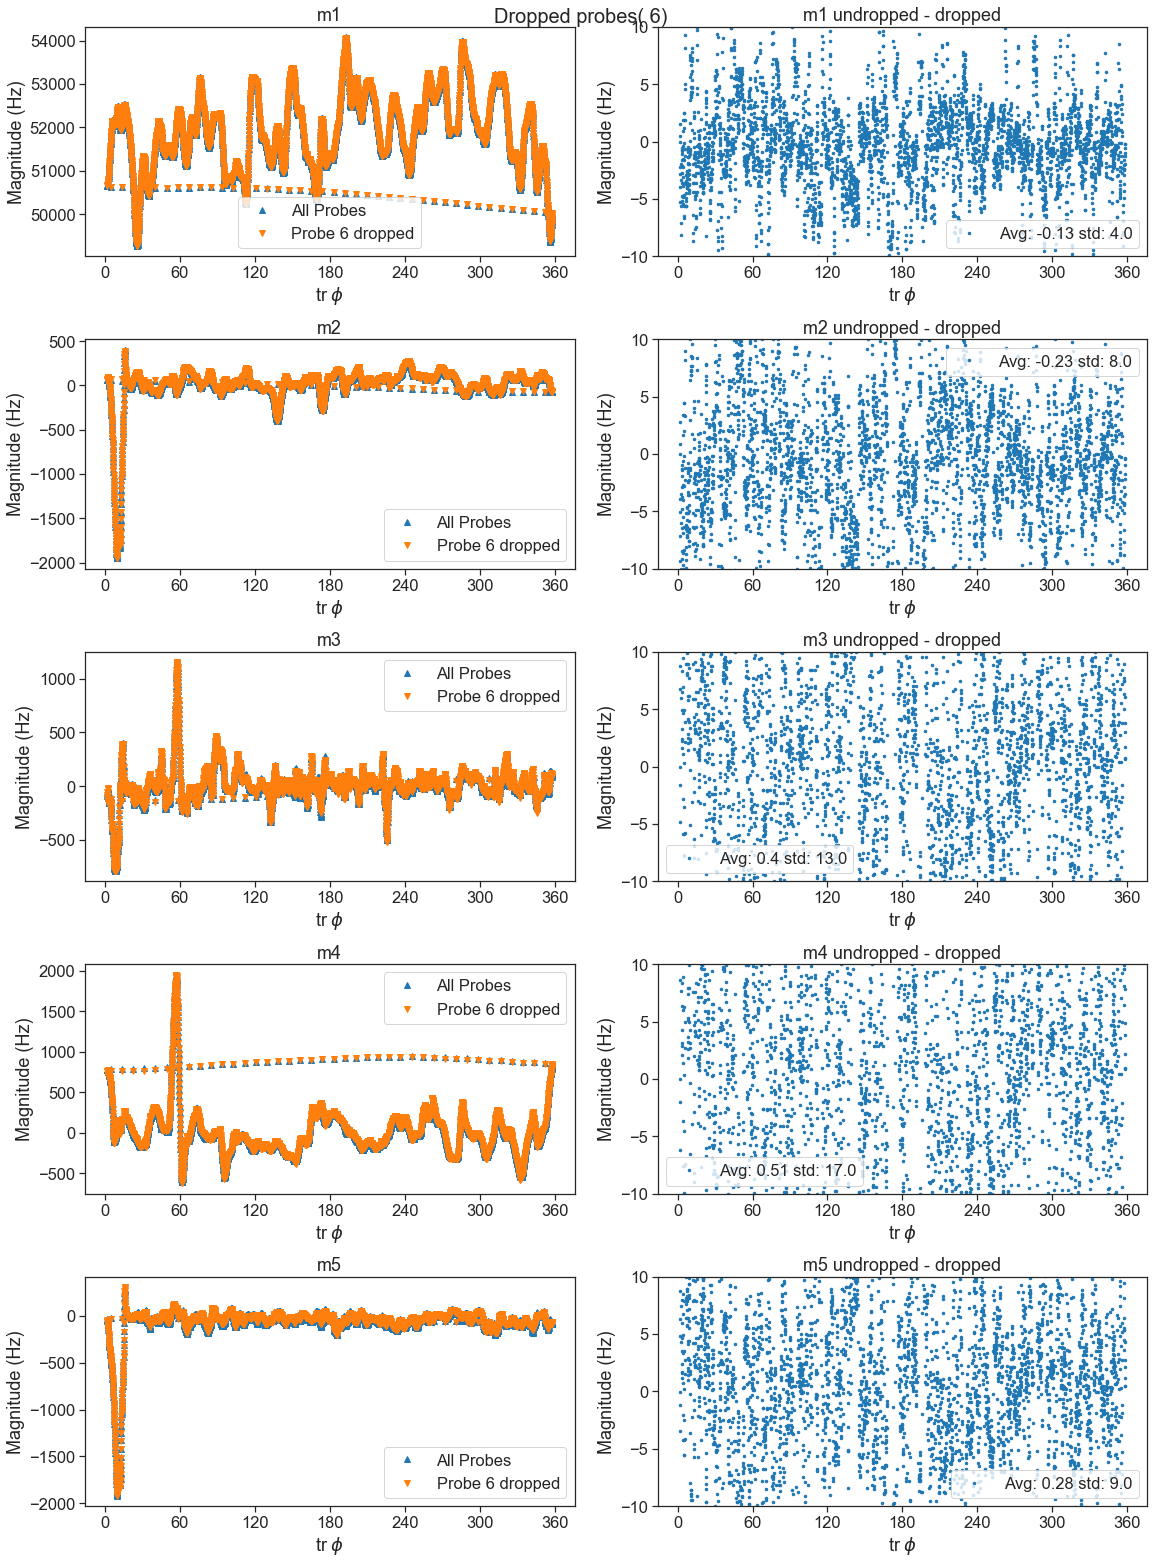

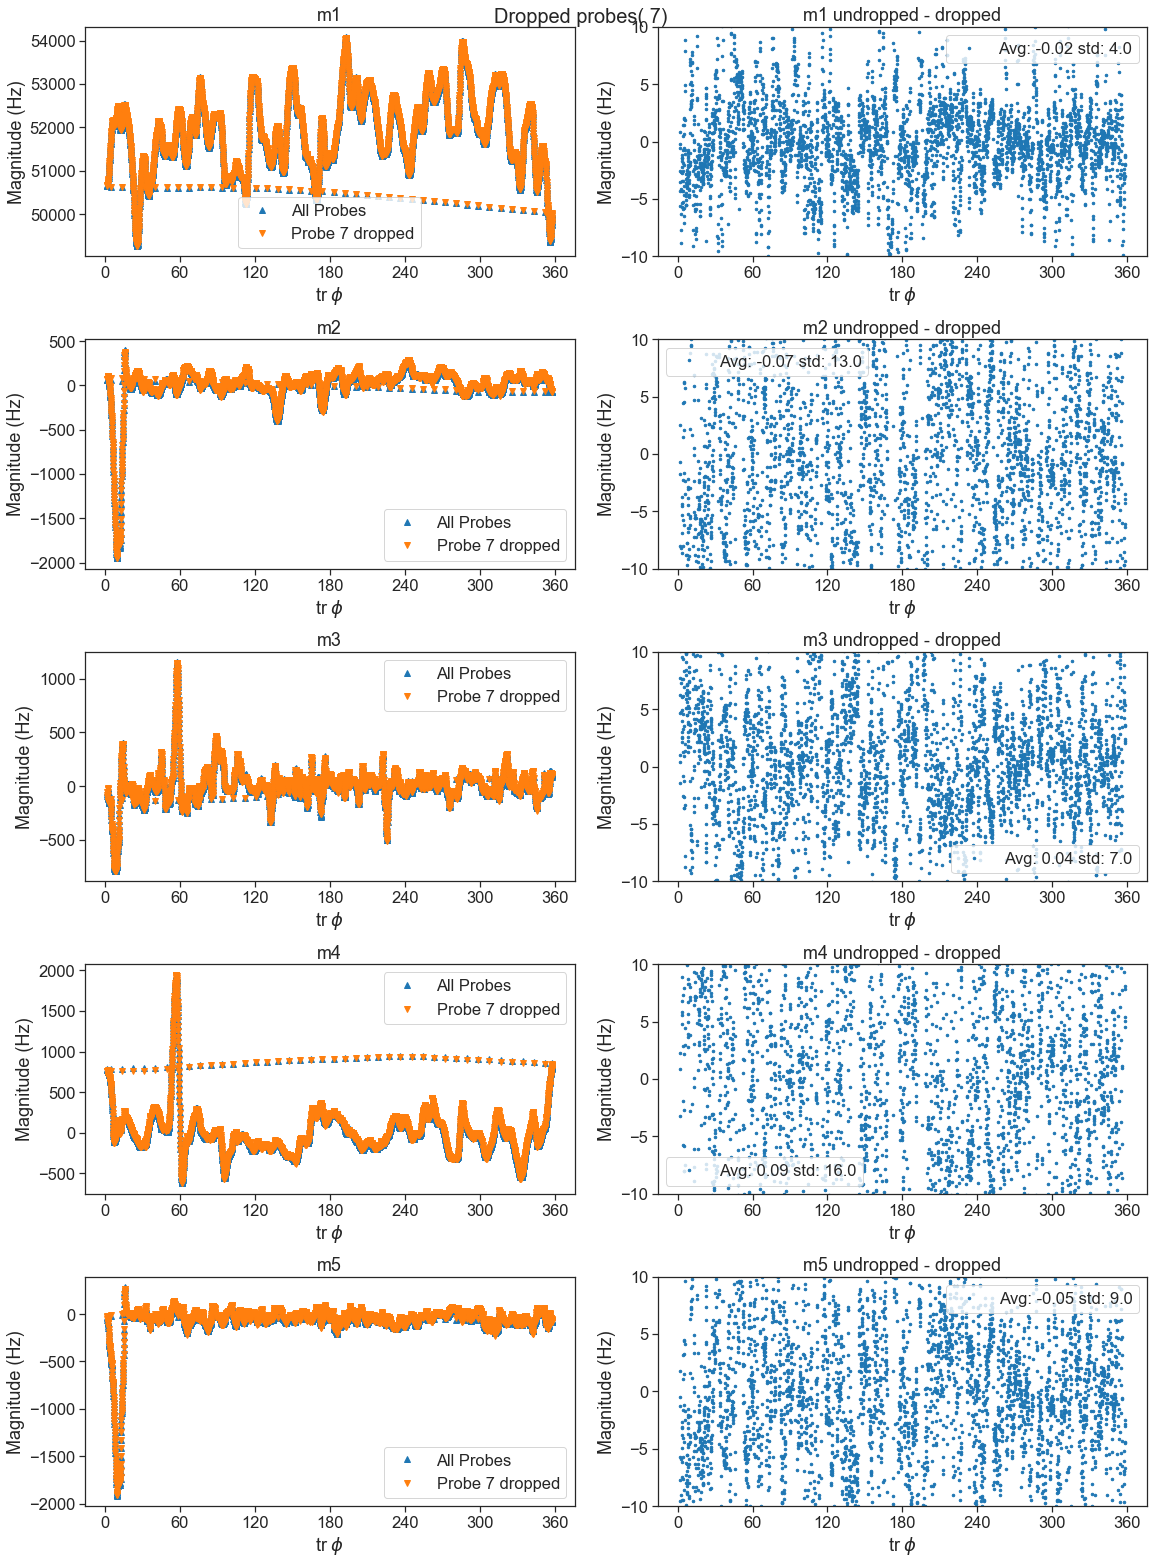

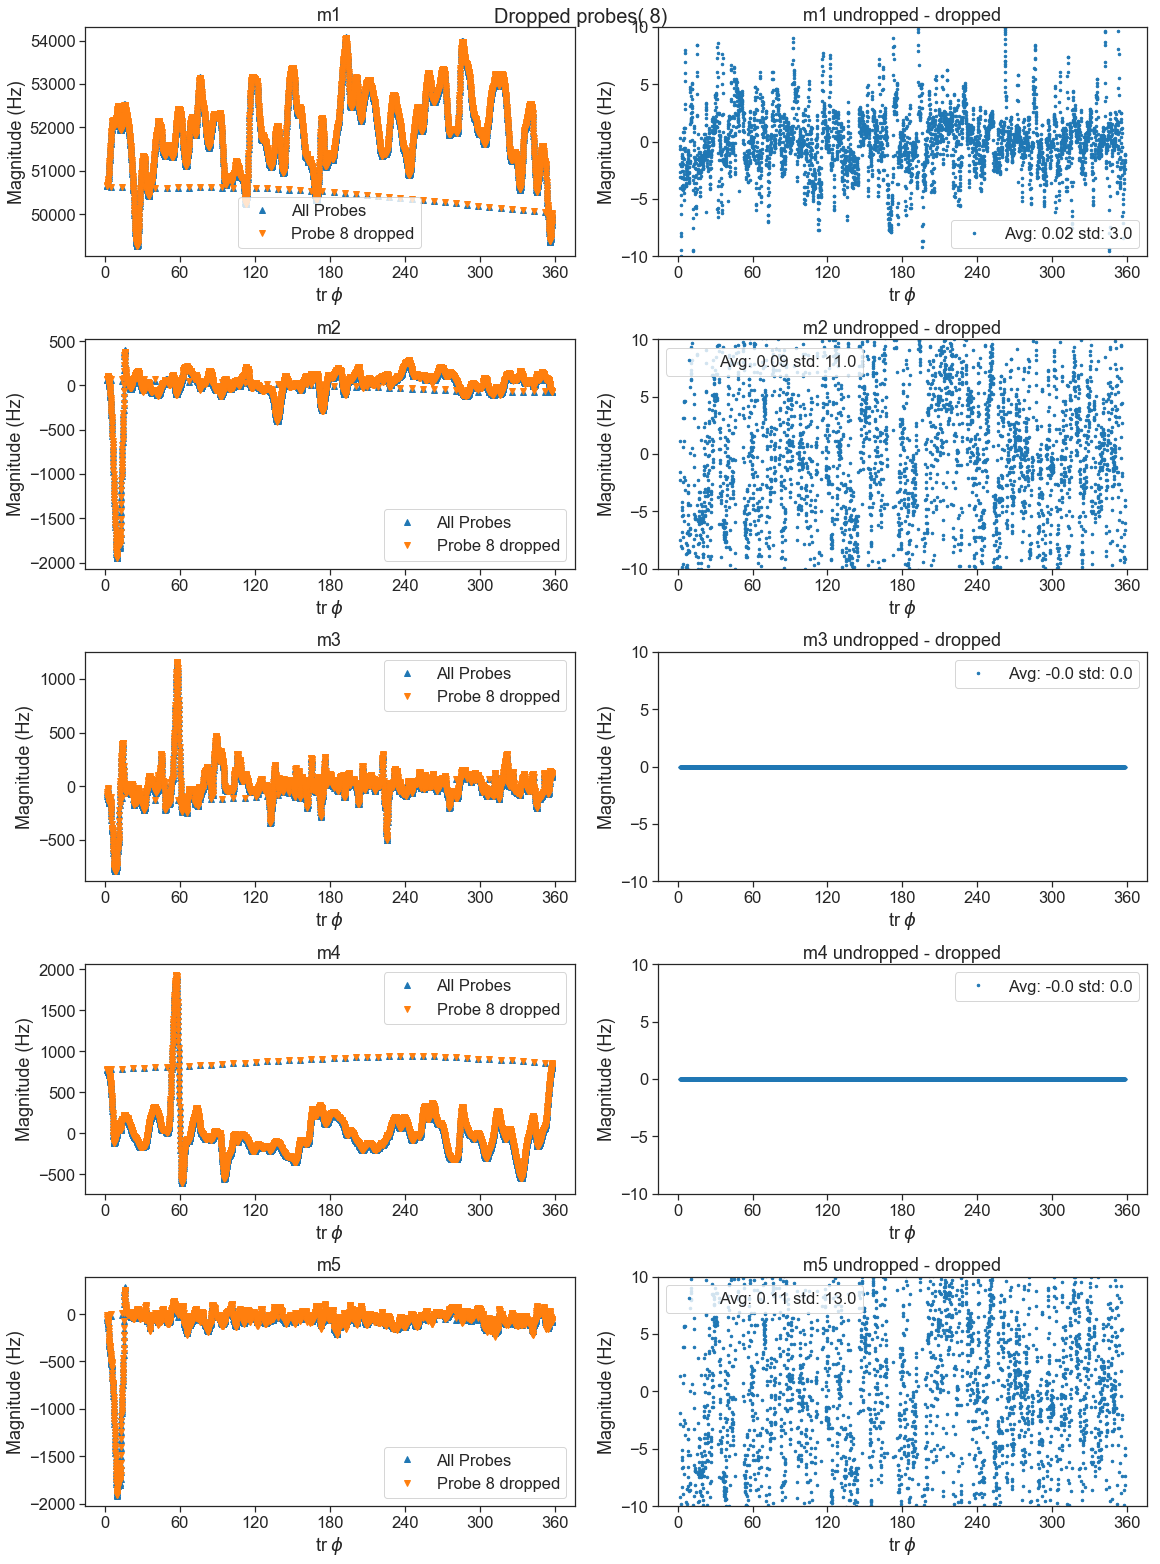

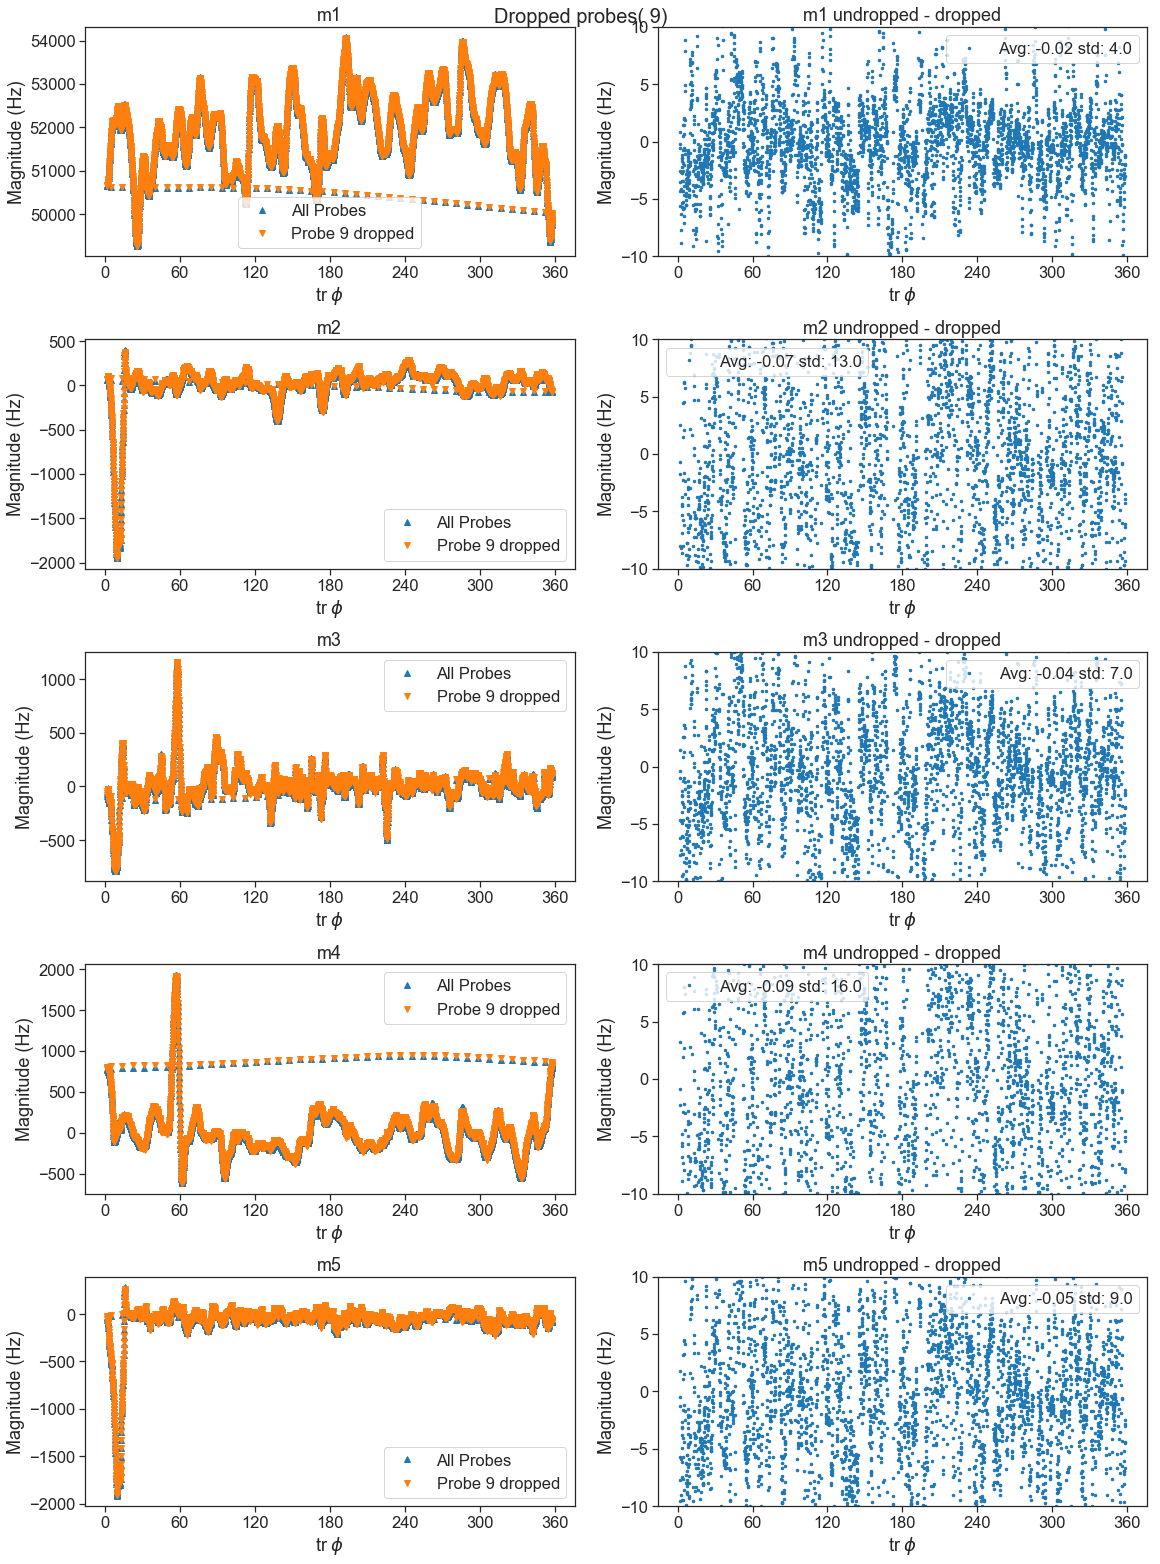

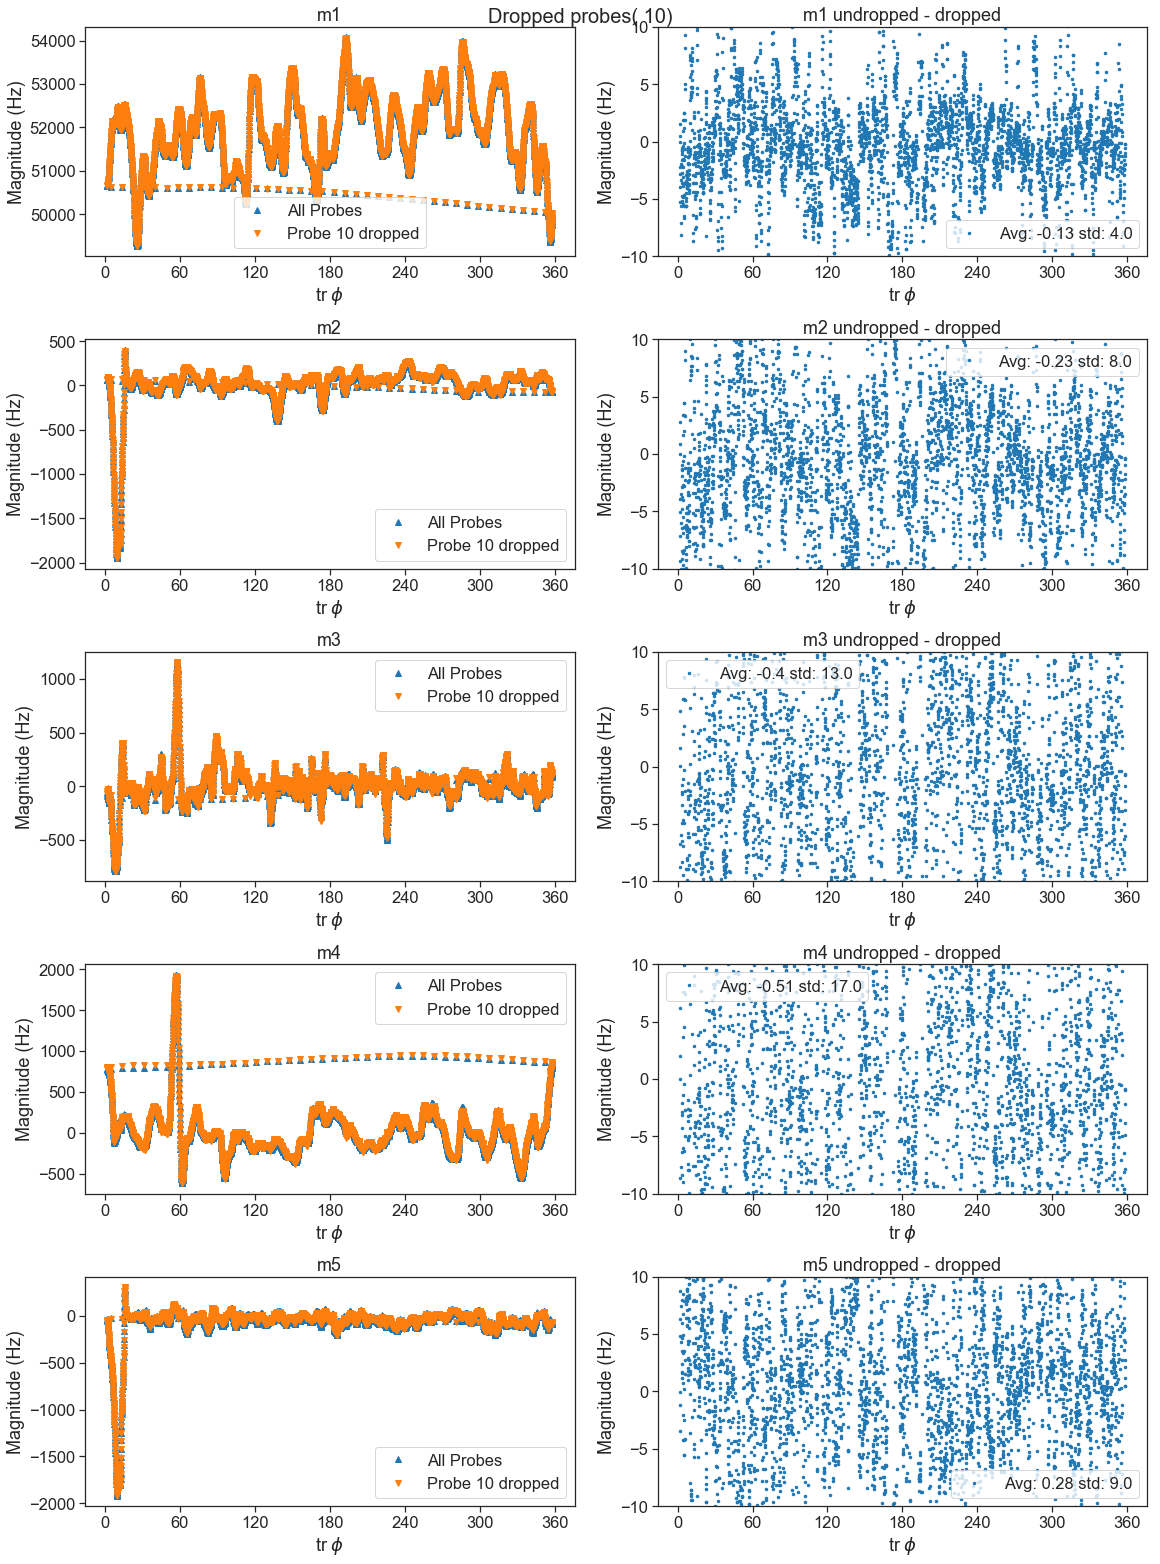

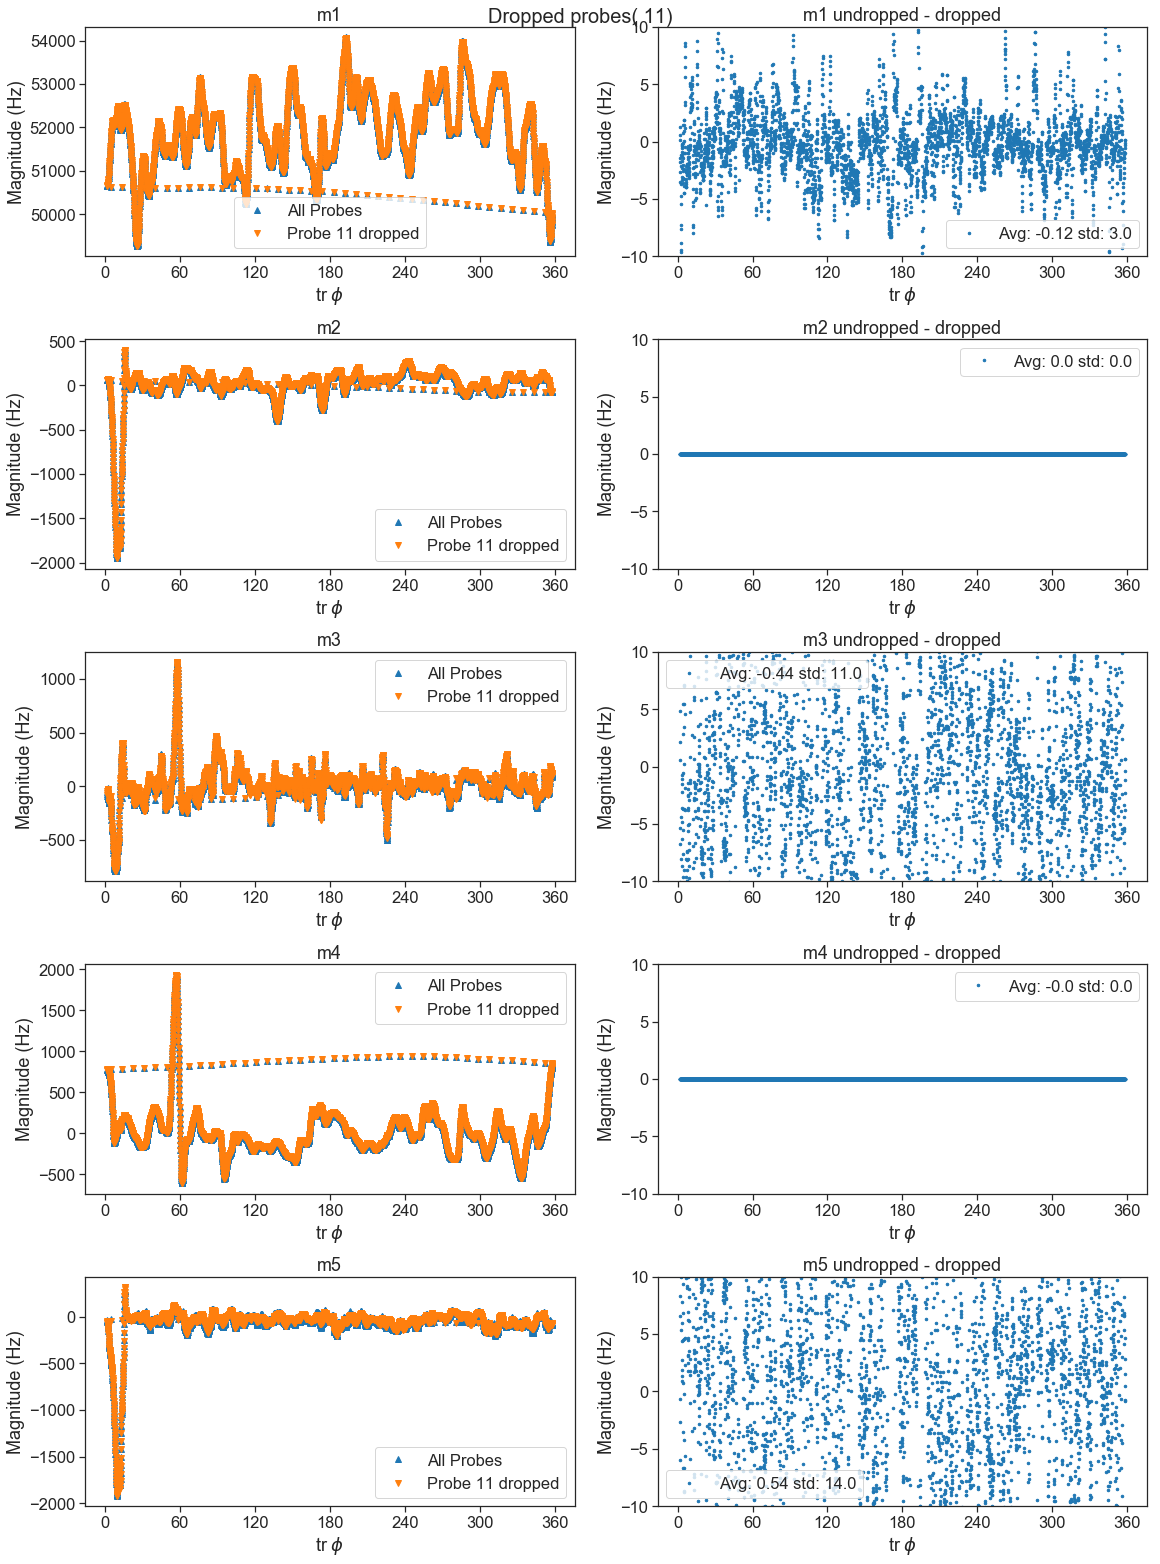

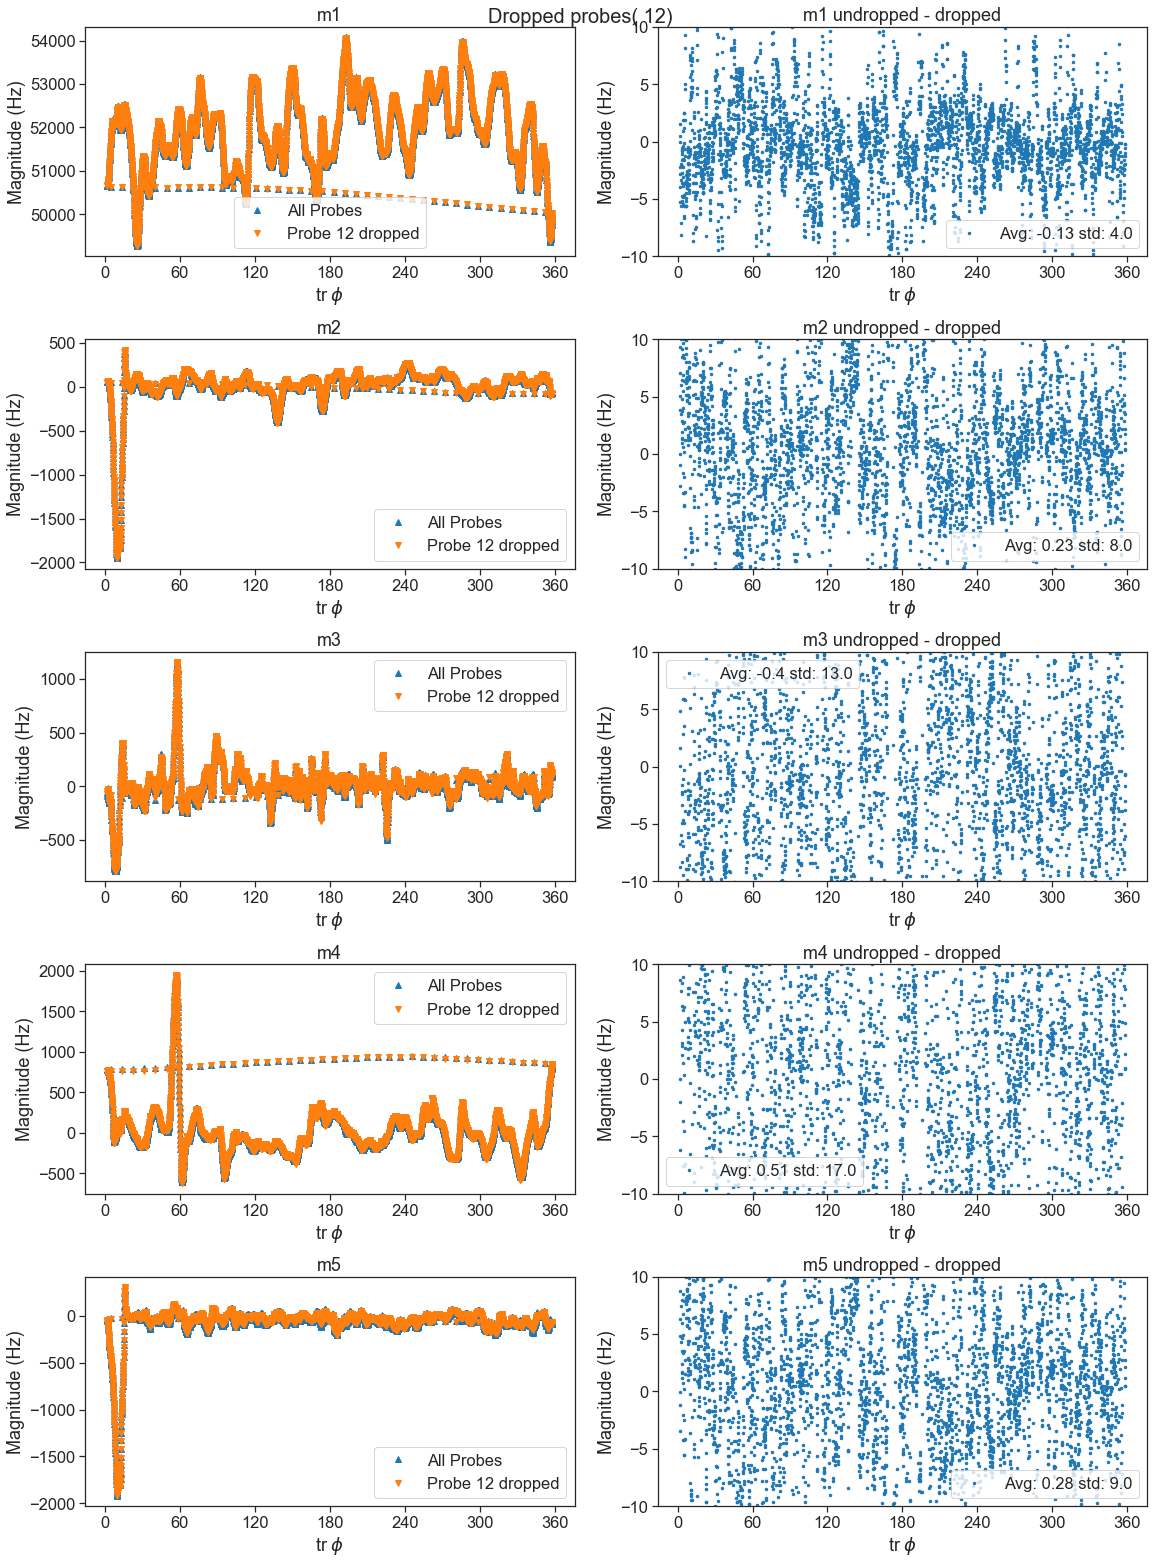

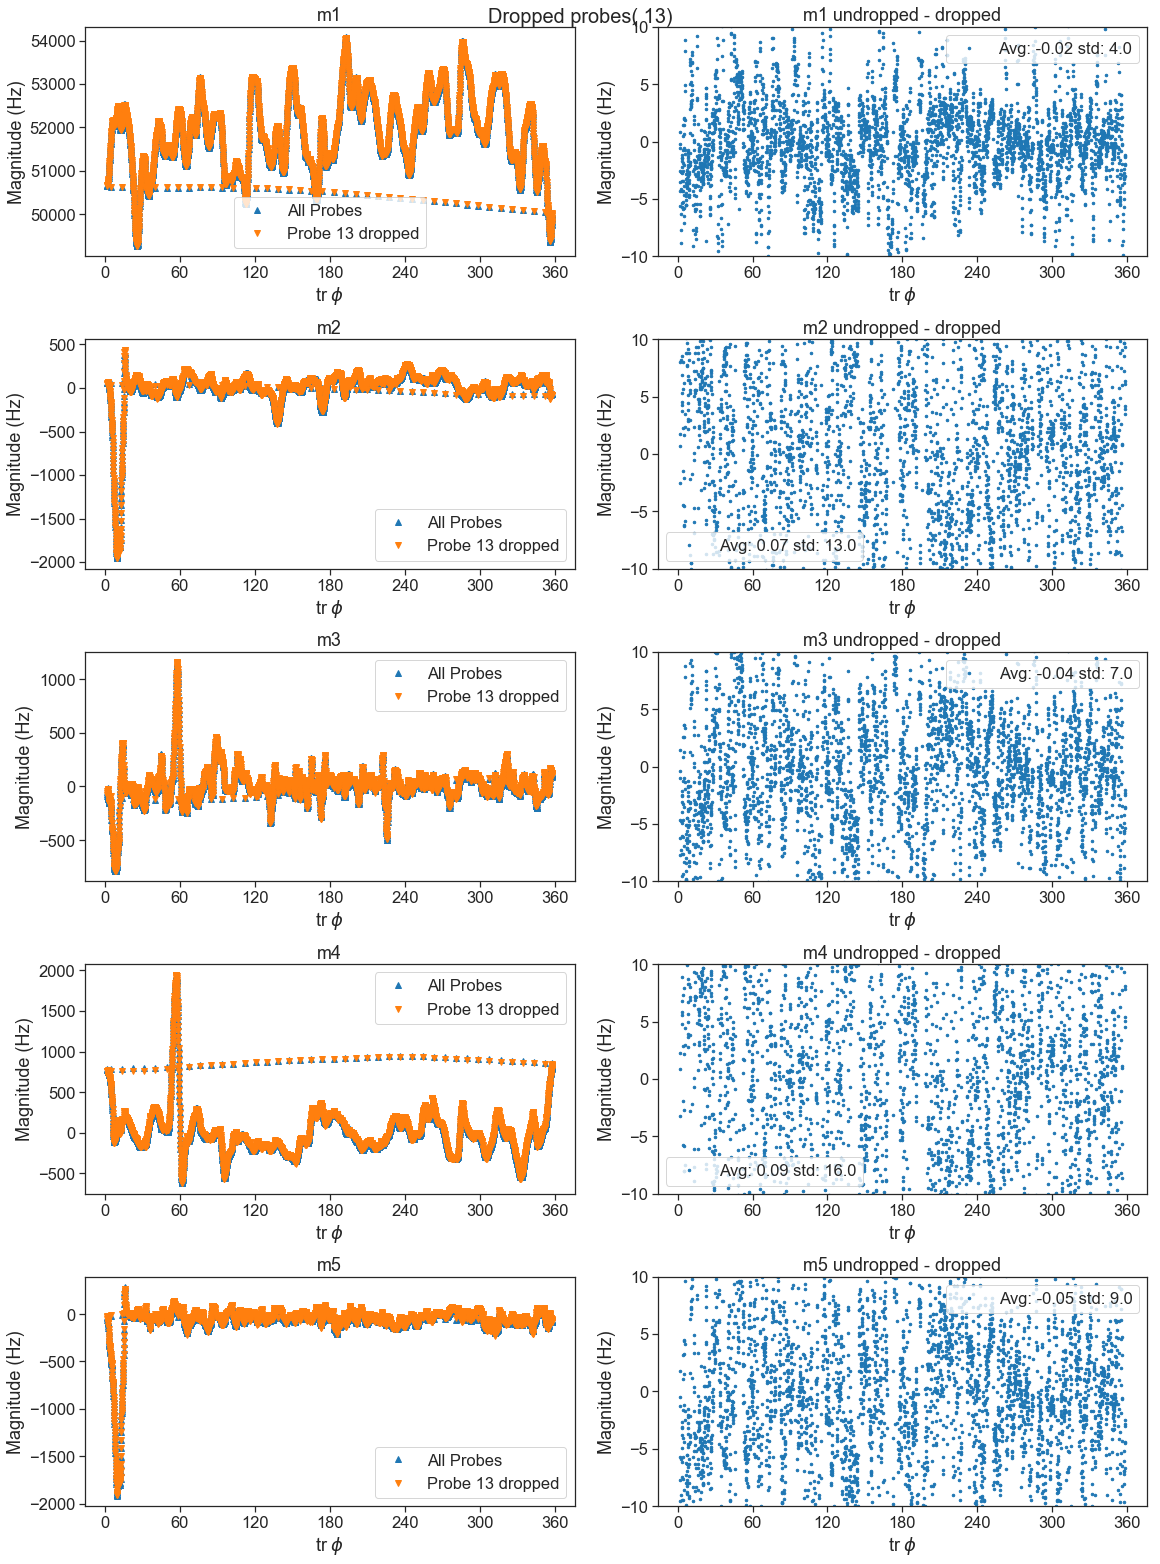

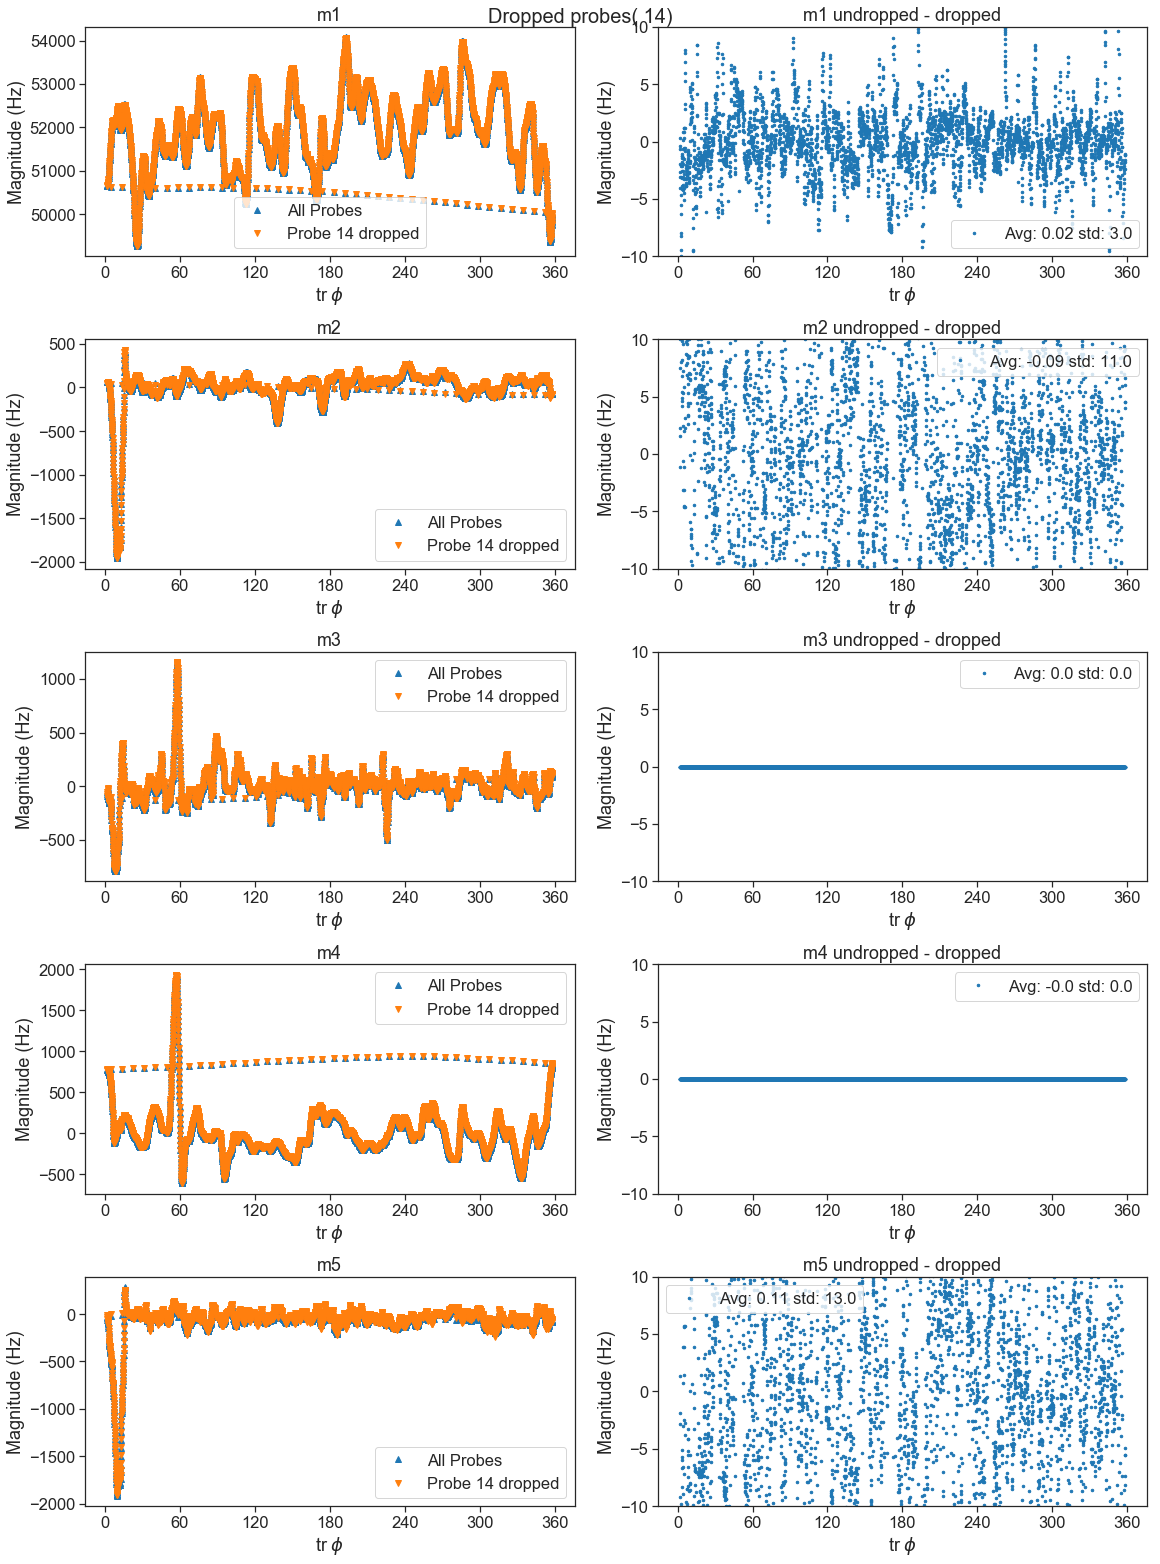

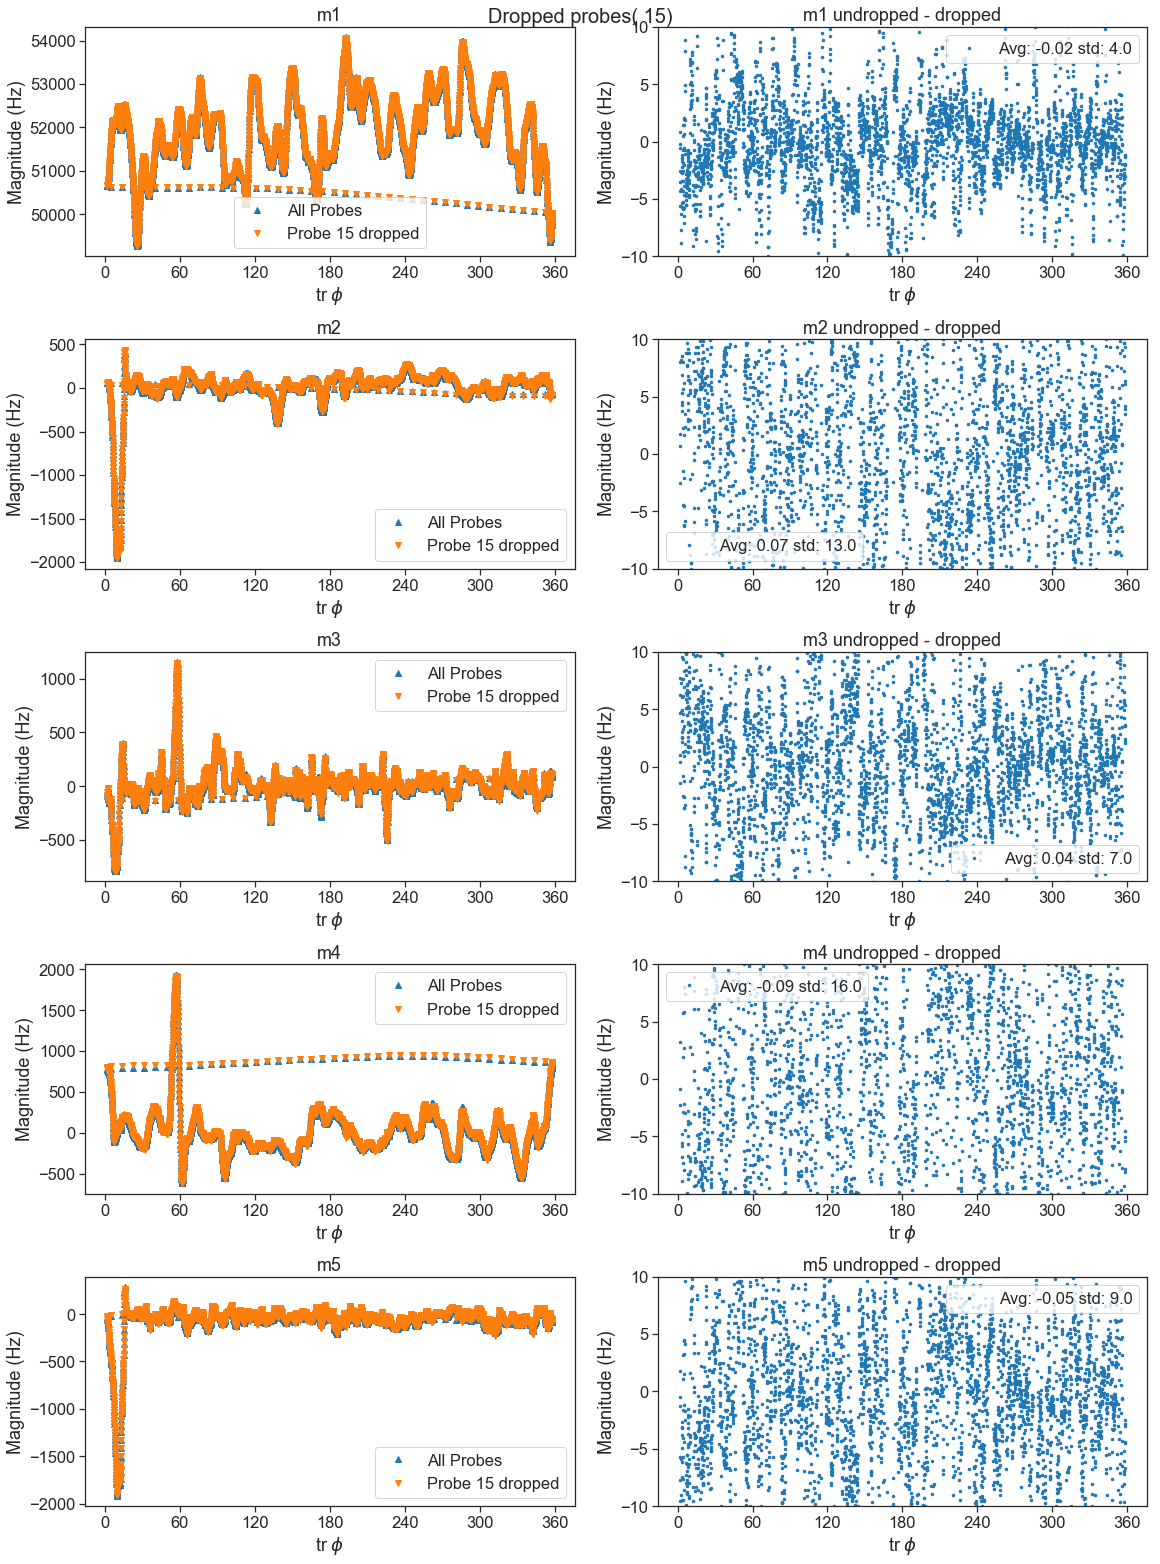

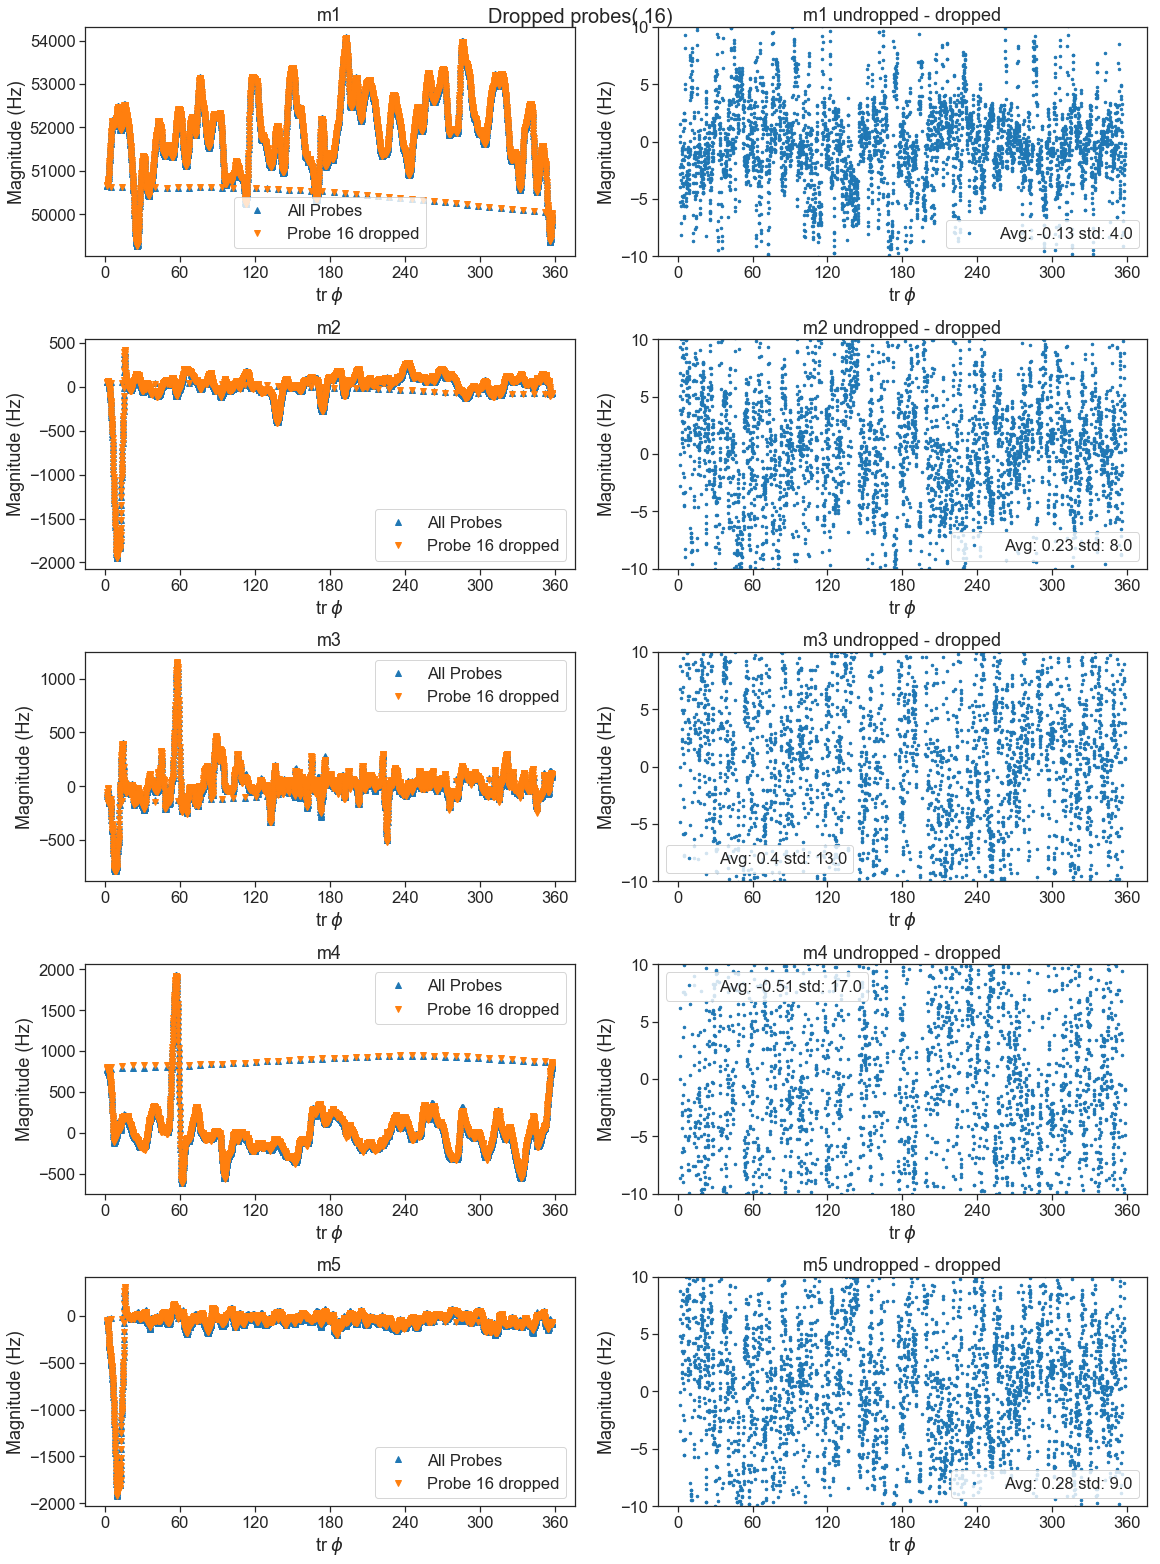

In [19]:
diffMax = []
for j in range(len(PossibleDropsN)):
    fig, axs = plt.subplots(5, 2, constrained_layout=True)
    fig.set_figheight(11*2)
    fig.set_figwidth(8*2)
    for i in range(5):
        M = len(trm_undropped[0])
        #diff = np.delete(trm_undropped[i] - trm_dropped[j,i], np.arange(M-100, M))
        diff = trm_undropped[i] - trm_dropped[j,i]
        t = np.delete(T, np.arange(M-100, M))
        axs[i,0].plot(tr_phi, trm_undropped[i], '^', label = "All Probes")
        axs[i,0].plot(tr_phi, trm_dropped[j,i], 'v', label = "Probe "+str(j)+" dropped")
        axs[i,0].set_xticks(np.linspace(0, 360, 7))
        axs[i,0].set_xlabel(r'tr $\phi$')
        axs[i,0].set_ylabel('Magnitude (Hz)')
        #plt_unix_time_to_CST(axs[i, 0])
        axs[i,0].legend()
        axs[i,0].set_title('m' + str(i+1))
        
        #t - t[0]
        axs[i,1].plot(tr_phi, diff, '.', markersize = 5, label = 'Avg: ' + str(round(np.average(diff),2))\
                     + r" std: " + str(round(np.std(diff)*1)))
        axs[i,1].set_xlabel(r'tr $\phi$')
        axs[i,1].set_ylabel('Magnitude (Hz)')
        axs[i,1].set_xticks(np.linspace(0, 360, 7))
        #plt_unix_time_to_CST(axs[i, 1])
        axs[i,1].legend()
        axs[i,1].set_title('m' + str(i+1) + ' undropped - dropped')
        axs[i,1].set_ylim(-10,10)
        #if(max(diff) < 15):
        #    axs[i,1].set_ylim(-7,7)
        #if(max(diff) > 15):
        #    axs[i,1].set_ylim(-85,85)
        diffMax.append(max(diff))
    fig.suptitle(DropsToLabel(PossibleDropsN[j]), fontsize = 20)
    plt.show()
    #fig.savefig(path + "/1Drop_" + DropsToLabel(PossibleDropsN[j]) + ".png")

In [13]:
diffs = np.array(diffMax)
print(diffs)
print(max(abs(diffs)))

[ 1.63468270e+00  4.77484718e-10 -3.00758529e-10  5.74118530e-12
  1.46229695e-11  2.27946160e+00 -2.58603450e-09 -2.11926476e-10
  1.11481313e-09  3.64629834e+00  2.61491687e+00  9.29745170e-10
 -2.42697240e-09  8.42703685e-11  2.94500348e+00  2.27946160e+00
  4.41918502e-09 -3.99680289e-10 -1.16057208e-09  3.64629834e+00
  2.61491687e+00  5.44019940e-10  2.12871853e-09  5.24596588e-10
  2.94500349e+00  1.61801975e+01 -2.84089197e-09  5.06813296e+01
  5.09726483e-10  6.24739989e+01  2.28339568e+01  4.07188962e+01
  6.05613134e+01  7.78645458e+01  4.32694313e+01  2.14765589e+01
  6.63346050e+01  3.58390626e+01  7.98108138e+01  4.73942931e+01
  1.43832693e+01  5.46347064e+01 -1.69589498e-09 -5.87675686e-10
  6.73472582e+01  2.14765589e+01  6.63346050e+01  3.82983021e+01
  8.52873493e+01  4.73942931e+01  2.28339568e+01  4.07188962e+01
  7.05271971e+01  9.06778248e+01  4.32694313e+01  1.61801975e+01
  6.56254429e-09  6.14603206e+01 -1.34173206e-09  6.24739989e+01
  2.28339568e+01  3.49650

Reading event 10030/10037 99.93%     
loop done: 100%                                    
Reading event 3000/3009 99.70%  
loop done: 100%                                    
[262.24255371 262.24255371 262.24255371 ... 261.80734253 261.80734253
 261.80734253]


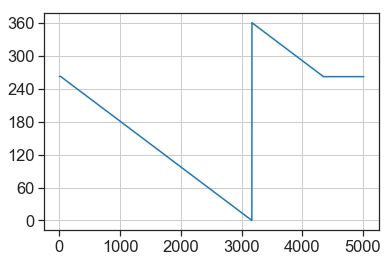

In [14]:
interp = helper.root_to_pandas([4265],\
                                  prefix = r'//data1/newg2/DataProduction/Offline/ArtTFSDir/v9_21_05_dev/FieldPlainRootOutput_',\
                                  tr_run = True)
#[5054]
print(interp['tr_phi'].to_numpy())
plt.plot(interp['tr_phi'].to_numpy())
plt.yticks(np.linspace(0, 360, 7))
plt.grid()
plt.show()

[14.063 14.063 14.063 ... 14.063 14.063 14.063]


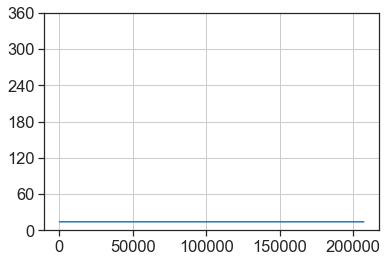

In [15]:
interp = pd.read_hdf('hdf5/superlong_2.h5')
#interp = helper.root_to_pandas([4584],\
#                                  prefix = r'//data1/newg2/DataProduction/Offline/ArtTFSDir/v9_21_05_dev/FieldPlainRootOutput_',\
#                                  tr_run = True)
print(interp['tr_phi'].to_numpy())
plt.plot(interp['tr_phi'].to_numpy())
plt.yticks(np.linspace(0, 360, 7))
plt.grid()
plt.show()

[99.03 99.03 99.03 ... 99.03 99.03 99.03]


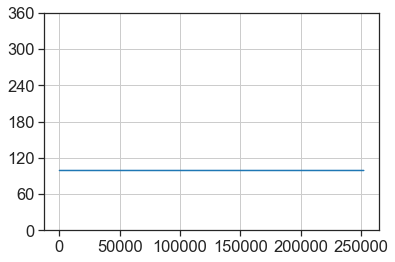

In [73]:
interp = pd.read_hdf('hdf5/superlong_1.h5')
#interp = helper.root_to_pandas([4584],\
#                                  prefix = r'//data1/newg2/DataProduction/Offline/ArtTFSDir/v9_21_05_dev/FieldPlainRootOutput_',\
#                                  tr_run = True)
print(interp['tr_phi'].to_numpy())
plt.plot(interp['tr_phi'].to_numpy())
plt.yticks(np.linspace(0, 360, 7))
plt.grid()
plt.show()